In [ ]:
# Uncomment and run if not already installed
# !pip install xgboost lightgbm scikit-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb


In [ ]:
# Load dataset
df = pd.read_csv('/content/NSL_KDD_Train.csv', header=None)

# Rename last column as 'label'
df.rename(columns={df.columns[-1]: 'label'}, inplace=True)

# Encode categorical columns
cat_cols = [1, 2, 3]
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode label: normal = 0, attack = 1
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Scale the features
X_scaled = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/content/NSL_KDD_Train.csv', header=None)
df.rename(columns={df.columns[-1]: 'label'}, inplace=True)

# Encode categorical columns
cat_cols = [1, 2, 3]
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode labels
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median'
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



📌 Confusion Matrix for Random Forest


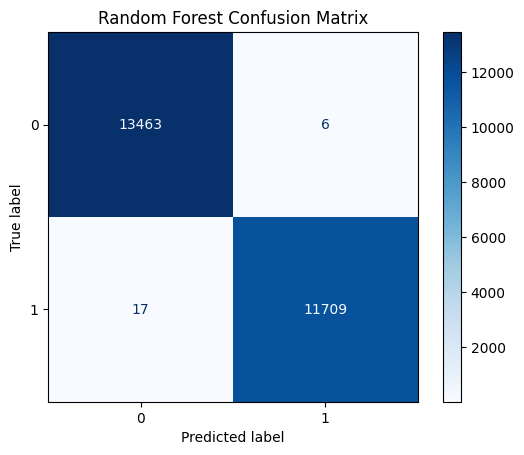


📌 Confusion Matrix for Decision Tree


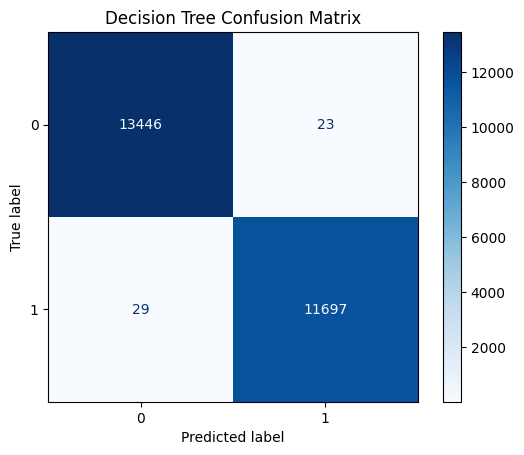


📌 Confusion Matrix for Logistic Regression


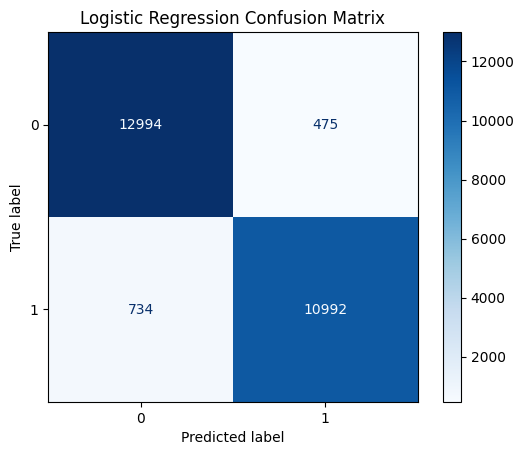

In [ ]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier()
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

    # Confusion Matrix
    print(f"\n📌 Confusion Matrix for {name}")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.grid(False)
    plt.show()


In [ ]:
# Install if needed
# !pip install xgboost lightgbm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)

# Load and preprocess
df = pd.read_csv('/content/NSL_KDD_Train.csv', header=None)
df.rename(columns={df.columns[-1]: 'label'}, inplace=True)

# Encode categorical
for col in [1, 2, 3]:
    df[col] = LabelEncoder().fit_transform(df[col])

# Label binary
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Split features & target
X = df.drop('label', axis=1)
y = df['label']

# Impute missing values
X = SimpleImputer(strategy='mean').fit_transform(X)

# Scale
X = StandardScaler().fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Random Forest:
Accuracy: 0.9990
Precision: 0.9994
Recall: 0.9984
F1 Score: 0.9989


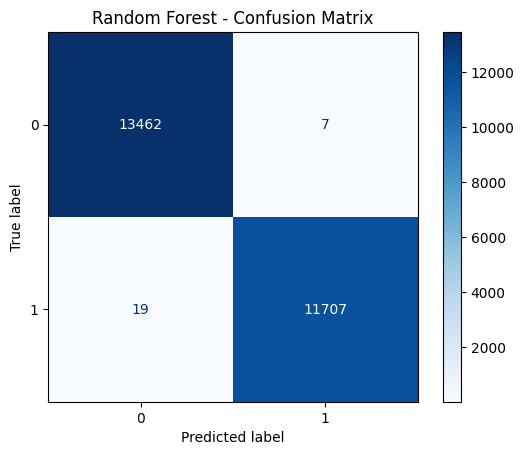

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()


Decision Tree:
Accuracy: 0.9980
Precision: 0.9981
Recall: 0.9975
F1 Score: 0.9978


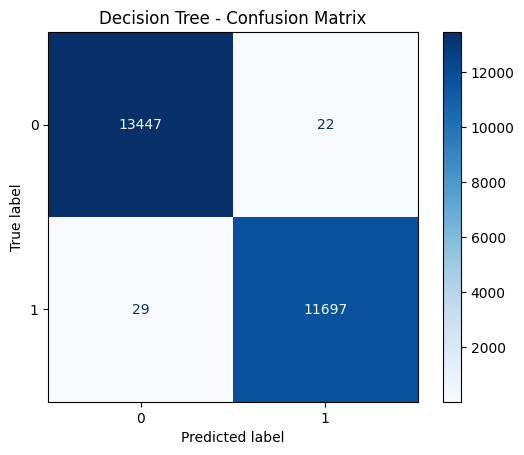

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Logistic Regression:
Accuracy: 0.9520
Precision: 0.9586
Recall: 0.9374
F1 Score: 0.9479


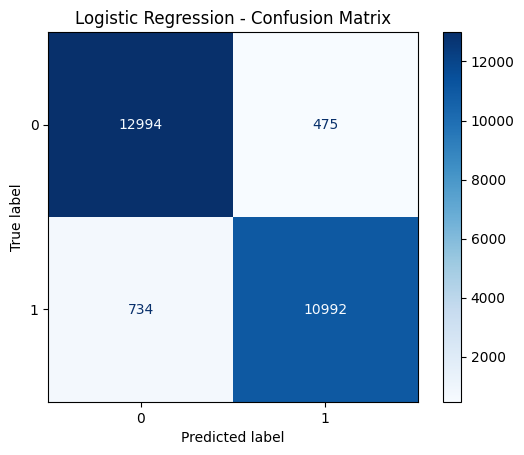

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


SVM:
Accuracy: 0.9922
Precision: 0.9930
Recall: 0.9902
F1 Score: 0.9916


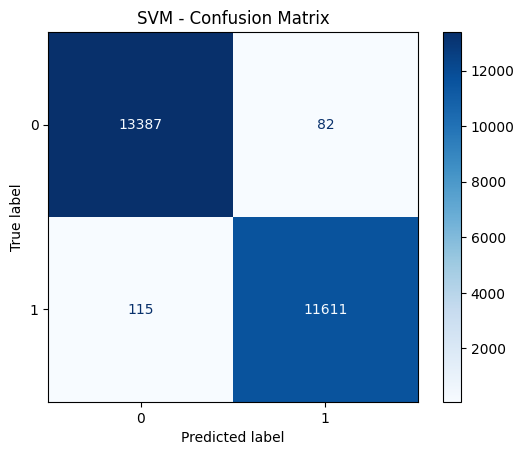

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

print("SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.show()


KNN:
Accuracy: 0.9960
Precision: 0.9962
Recall: 0.9952
F1 Score: 0.9957


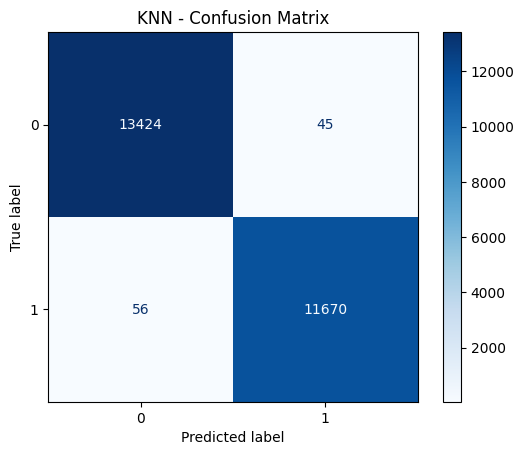

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

print("KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:45:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9992
F1 Score: 0.9993


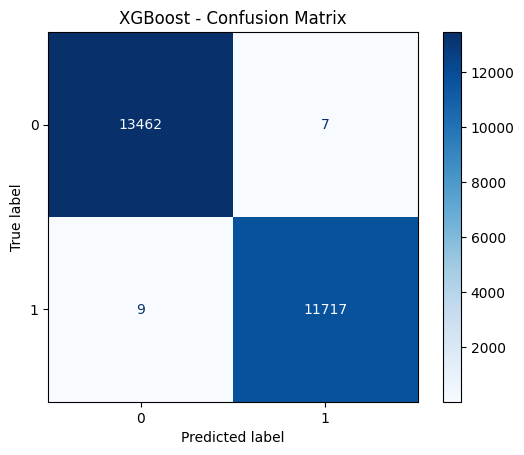

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 46904, number of negative: 53874
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.247103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3155
[LightGBM] [Info] Number of data points in the train set: 100778, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465419 -> initscore=-0.138545
[LightGBM] [Info] Start training from score -0.138545


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM:
Accuracy: 0.9991
Precision: 0.9994
Recall: 0.9987
F1 Score: 0.9991


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


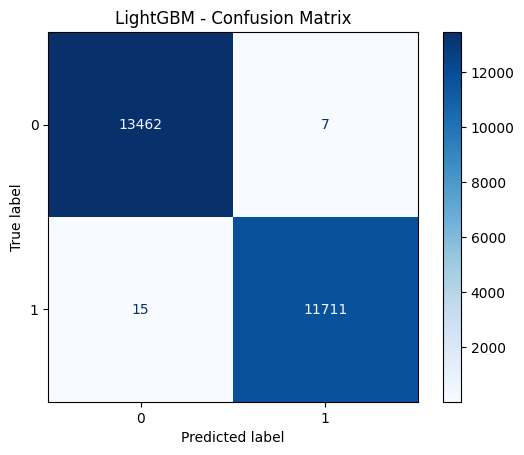

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb):.4f}")

ConfusionMatrixDisplay.from_estimator(lgb_model, X_test, y_test, cmap='Blues')
plt.title("LightGBM - Confusion Matrix")
plt.show()


,Model,Accuracy,Precision,Recall,F1 Score
5,XGBoost,0.999365,0.999403,0.999232,0.999318
6,LightGBM,0.999127,0.999403,0.998721,0.999062
0,Random Forest,0.998968,0.999402,0.998380,0.998891
1,Decision Tree,0.997976,0.998123,0.997527,0.997825
4,KNN,0.995991,0.996159,0.995224,0.995691
3,SVM,0.992181,0.992987,0.990193,0.991588
2,Logistic Regression,0.952014,0.958577,0.937404,0.947872


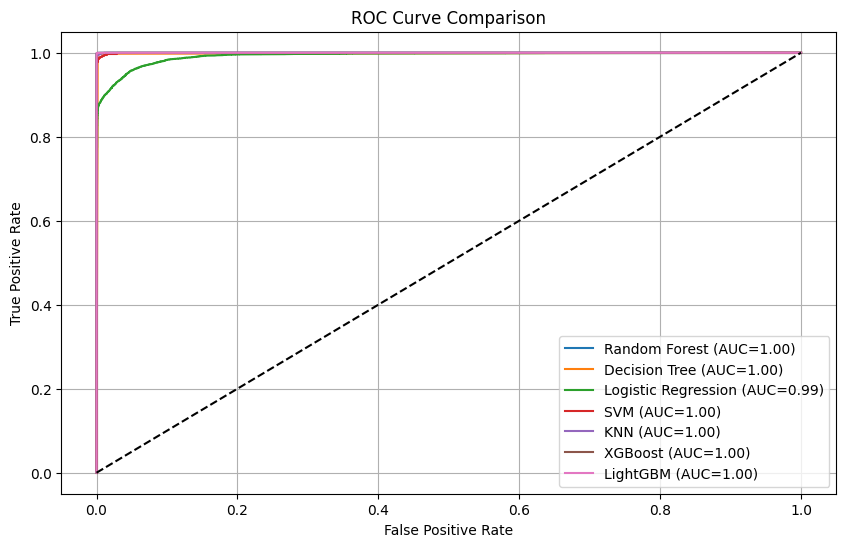

from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='F1 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
comparison = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM", "KNN", "XGBoost", "LightGBM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_lgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_lgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_lgb)
    ]
}

comparison_df = pd.DataFrame(comparison)
display(comparison_df.sort_values(by="Accuracy", ascending=False))

# Optional: ROC Curve Comparison
plt.figure(figsize=(10,6))
for name, y_proba in zip(
    comparison["Model"],
    [y_proba_rf, y_proba_dt, y_proba_lr, y_proba_svm, y_proba_knn, y_proba_xgb, y_proba_lgb]
):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-13-6464ac5611f0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette=palette)


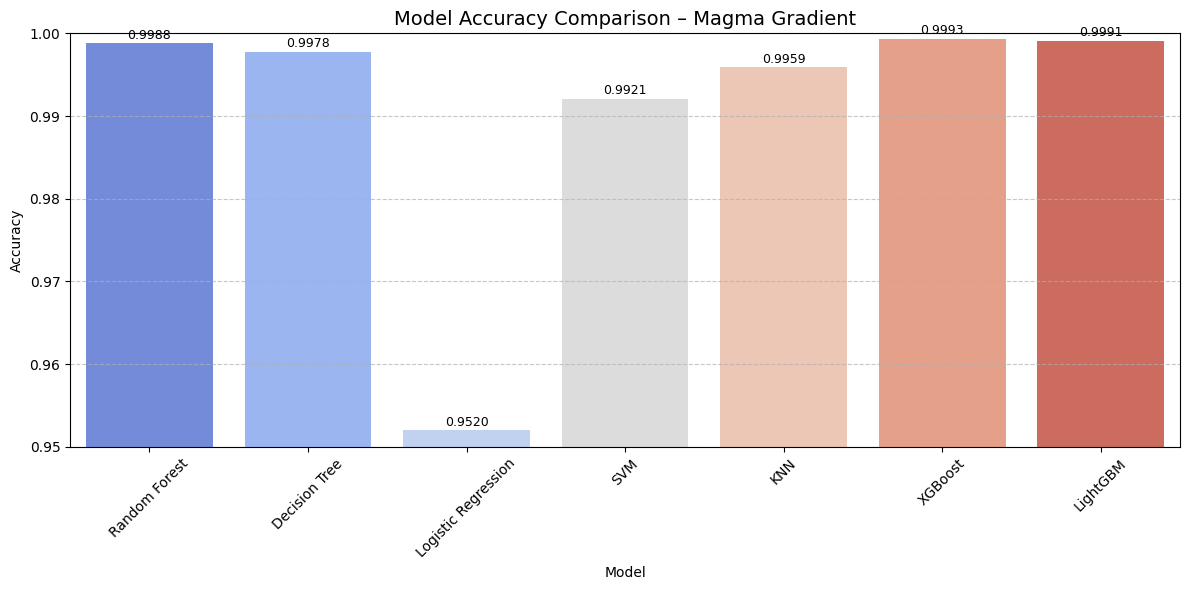

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace with your actual model results
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM", "KNN", "XGBoost", "LightGBM"],
    "Accuracy": [0.9988, 0.9978, 0.9520, 0.9921, 0.9959, 0.9993, 0.9991],
    "F1 Score": [0.9987, 0.9976, 0.9478, 0.9915, 0.9956, 0.9993, 0.9990]
})

# Identify the best model by accuracy
best_model = comparison_df.loc[comparison_df["Accuracy"].idxmax(), "Model"]

# Set colors - highlight best model
# Use magma gradient palette
palette = sns.color_palette("coolwarm", len(comparison_df))

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette=palette)

for idx, row in comparison_df.iterrows():
    plt.text(idx, row["Accuracy"] + 0.0002, f'{row["Accuracy"]:.4f}', ha='center', va='bottom', fontsize=9)

plt.title("Model Accuracy Comparison – Magma Gradient", fontsize=14)
plt.ylim(0.95, 1.0)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-17-5897d3603654>:30: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


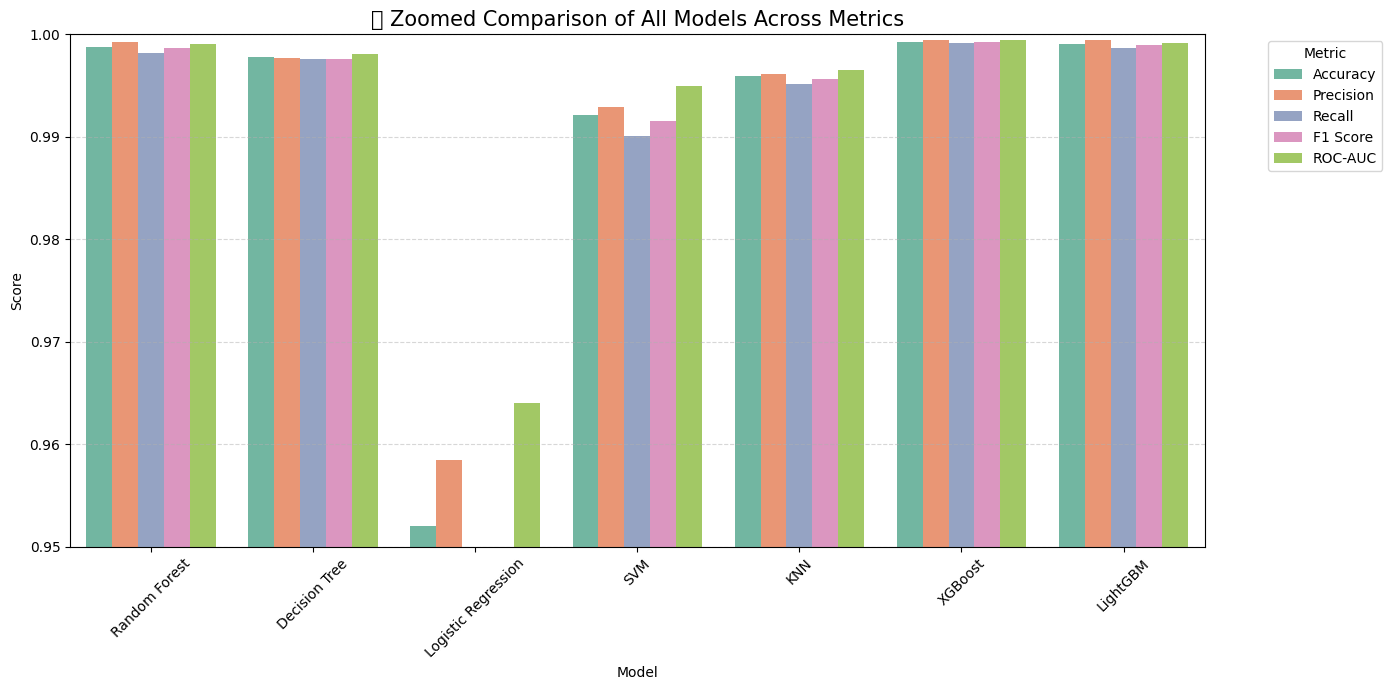

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace this with your actual values
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM", "KNN", "XGBoost", "LightGBM"],
    "Accuracy": [0.9988, 0.9978, 0.9520, 0.9921, 0.9959, 0.9993, 0.9991],
    "Precision": [0.9993, 0.9977, 0.9585, 0.9929, 0.9961, 0.9994, 0.9994],
    "Recall": [0.9982, 0.9976, 0.9374, 0.9901, 0.9952, 0.9992, 0.9987],
    "F1 Score": [0.9987, 0.9976, 0.9478, 0.9915, 0.9956, 0.9993, 0.9990],
    "ROC-AUC": [0.9991, 0.9981, 0.9640, 0.9950, 0.9965, 0.9994, 0.9992]
})

# Melt the dataframe for grouped plotting
df_long = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot with zoomed Y-axis to expose small differences
plt.figure(figsize=(14, 7))
sns.barplot(data=df_long, x='Model', y='Score', hue='Metric', palette='Set2')

# Zoom in to expose top performers' differences
plt.ylim(0.95, 1.0)

plt.title("🔍 Zoomed Comparison of All Models Across Metrics", fontsize=15)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metric')
plt.tight_layout()
plt.show()


<ipython-input-18-7b2185adb8cc>:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


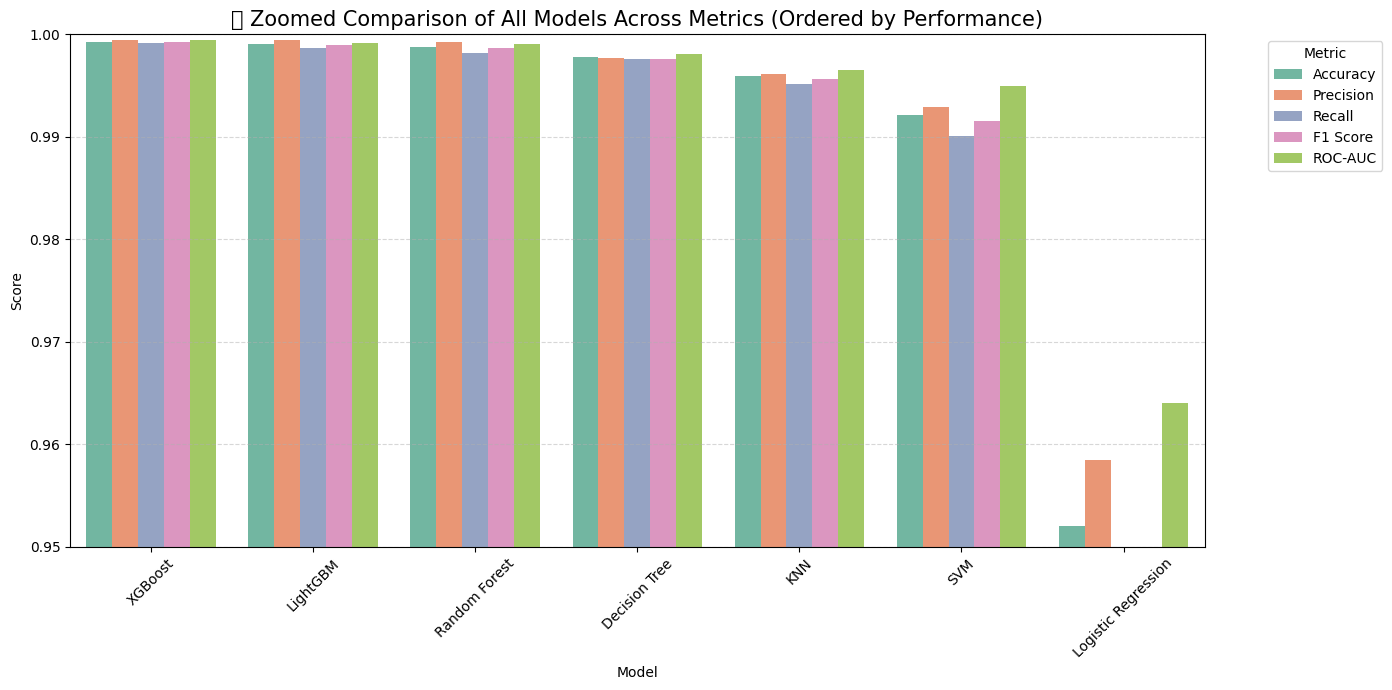

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM", "KNN", "XGBoost", "LightGBM"],
    "Accuracy": [0.9988, 0.9978, 0.9520, 0.9921, 0.9959, 0.9993, 0.9991],
    "Precision": [0.9993, 0.9977, 0.9585, 0.9929, 0.9961, 0.9994, 0.9994],
    "Recall": [0.9982, 0.9976, 0.9374, 0.9901, 0.9952, 0.9992, 0.9987],
    "F1 Score": [0.9987, 0.9976, 0.9478, 0.9915, 0.9956, 0.9993, 0.9990],
    "ROC-AUC": [0.9991, 0.9981, 0.9640, 0.9950, 0.9965, 0.9994, 0.9992]
})

# Calculate average score for sorting
comparison_df['Average_Score'] = comparison_df.loc[:, 'Accuracy':'ROC-AUC'].mean(axis=1)

# Sort dataframe by average score descending
comparison_df = comparison_df.sort_values(by='Average_Score', ascending=False)

# Melt the dataframe for plotting
df_long = comparison_df.melt(id_vars=['Model', 'Average_Score'], var_name='Metric', value_name='Score')

# Plot with models in order of average score
plt.figure(figsize=(14, 7))
sns.barplot(data=df_long, x='Model', y='Score', hue='Metric', palette='Set2', order=comparison_df['Model'])

plt.ylim(0.95, 1.0)
plt.title("🔍 Zoomed Comparison of All Models Across Metrics (Ordered by Performance)", fontsize=15)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metric')
plt.tight_layout()
plt.show()


<ipython-input-21-f07e31b07494>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


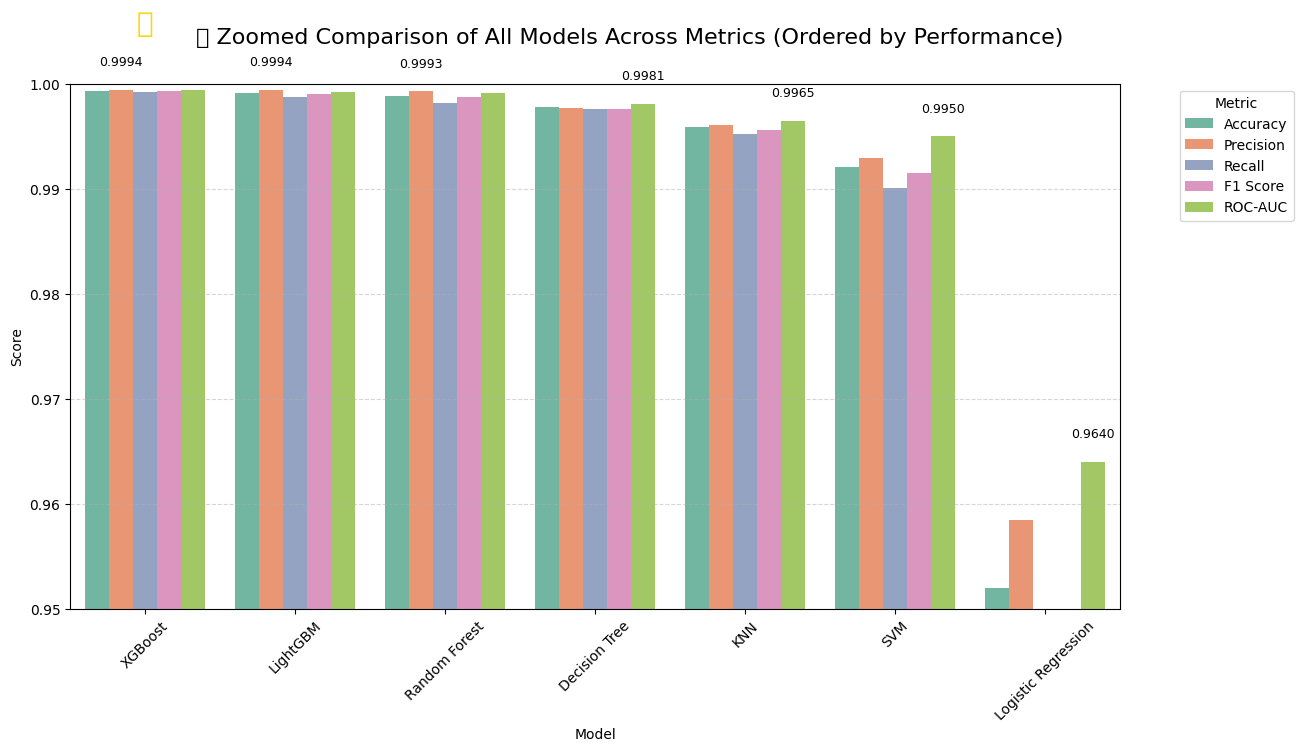

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM", "KNN", "XGBoost", "LightGBM"],
    "Accuracy": [0.9988, 0.9978, 0.9520, 0.9921, 0.9959, 0.9993, 0.9991],
    "Precision": [0.9993, 0.9977, 0.9585, 0.9929, 0.9961, 0.9994, 0.9994],
    "Recall": [0.9982, 0.9976, 0.9374, 0.9901, 0.9952, 0.9992, 0.9987],
    "F1 Score": [0.9987, 0.9976, 0.9478, 0.9915, 0.9956, 0.9993, 0.9990],
    "ROC-AUC": [0.9991, 0.9981, 0.9640, 0.9950, 0.9965, 0.9994, 0.9992]
})

comparison_df['Average_Score'] = comparison_df.loc[:, 'Accuracy':'ROC-AUC'].mean(axis=1)
comparison_df = comparison_df.sort_values(by='Average_Score', ascending=False)
df_long = comparison_df.melt(id_vars=['Model', 'Average_Score'], var_name='Metric', value_name='Score')

# Create figure and axis objects with increased figure size
fig, ax = plt.subplots(figsize=(14, 7))

# Plot barplot with specified order on the created axis
barplot = sns.barplot(
    data=df_long,
    x='Model',
    y='Score',
    hue='Metric',
    palette='Set2',
    order=comparison_df['Model'],
    ax=ax
)

ax.set_ylim(0.95, 1.0)
ax.set_ylabel("Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metric')

# Highlight best overall model
best_model = comparison_df.iloc[0]['Model']
x_positions = {model: i for i, model in enumerate(comparison_df['Model'])}
best_x = x_positions[best_model]
num_metrics = df_long['Metric'].nunique()
bar_width = 0.8 / num_metrics

best_model_scores = df_long[df_long['Model'] == best_model]['Score']
star_y = best_model_scores.max() + 0.005

ax.text(
    best_x,
    star_y,
    "⭐",
    fontsize=20,
    ha='center',
    va='bottom',
    color='gold'
)

# Annotate only highest metric per model
for model in comparison_df['Model']:
    model_data = df_long[df_long['Model'] == model]
    max_row = model_data.loc[model_data['Score'].idxmax()]
    metric = max_row['Metric']
    score = max_row['Score']
    metric_idx = list(df_long['Metric'].unique()).index(metric)
    x = best_x = x_positions[model] - 0.4 + bar_width / 2 + metric_idx * bar_width

    ax.text(
        x,
        score + 0.002,
        f"{score:.4f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        rotation=0
    )

# Adjust subplot params for bigger border (left, right, top, bottom)
fig.subplots_adjust(left=0.1, right=0.85, top=0.90, bottom=0.15)

# Set the title at the top AFTER annotations
fig.suptitle("🔍 Zoomed Comparison of All Models Across Metrics (Ordered by Performance)", fontsize=16, y=0.98)

plt.show()
